# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков." data-toc-modified-id="Стиль-заголовков.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков.</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Определяем-и-изучаем-пропущенные-значения." data-toc-modified-id="Определяем-и-изучаем-пропущенные-значения.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Определяем и изучаем пропущенные значения.</a></span><ul class="toc-item"><li><span><a href="#Изучим-пропуски-в-days_exposition-и-изменим-тип-данных-на-int." data-toc-modified-id="Изучим-пропуски-в-days_exposition-и-изменим-тип-данных-на-int.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Изучим пропуски в days_exposition и изменим тип данных на int.</a></span></li><li><span><a href="#Столбец-locality_name" data-toc-modified-id="Столбец-locality_name-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Столбец locality_name</a></span></li><li><span><a href="#Столбец-balcony" data-toc-modified-id="Столбец-balcony-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Столбец balcony</a></span></li><li><span><a href="#Столбец-first_day_exposition" data-toc-modified-id="Столбец-first_day_exposition-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Столбец first_day_exposition</a></span></li><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Столбец ceiling_height</a></span></li><li><span><a href="#Столбец-is_apartment" data-toc-modified-id="Столбец-is_apartment-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Столбец is_apartment</a></span></li><li><span><a href="#Столбец-last_price" data-toc-modified-id="Столбец-last_price-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Столбец last_price</a></span></li><li><span><a href="#Столбец-floors_total" data-toc-modified-id="Столбец-floors_total-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Столбец floors_total</a></span></li><li><span><a href="#Столбец-living_area" data-toc-modified-id="Столбец-living_area-2.2.9"><span class="toc-item-num">2.2.9&nbsp;&nbsp;</span>Столбец living_area</a></span></li><li><span><a href="#Столбец-kitchen_area" data-toc-modified-id="Столбец-kitchen_area-2.2.10"><span class="toc-item-num">2.2.10&nbsp;&nbsp;</span>Столбец kitchen_area</a></span></li><li><span><a href="#Столбец-airports_nearest" data-toc-modified-id="Столбец-airports_nearest-2.2.11"><span class="toc-item-num">2.2.11&nbsp;&nbsp;</span>Столбец airports_nearest</a></span></li><li><span><a href="#Столбец-city_centers_nearest" data-toc-modified-id="Столбец-city_centers_nearest-2.2.12"><span class="toc-item-num">2.2.12&nbsp;&nbsp;</span>Столбец city_centers_nearest</a></span></li><li><span><a href="#Столбец-parks_around_3000" data-toc-modified-id="Столбец-parks_around_3000-2.2.13"><span class="toc-item-num">2.2.13&nbsp;&nbsp;</span>Столбец parks_around_3000</a></span></li><li><span><a href="#Столбец-parks_nearest" data-toc-modified-id="Столбец-parks_nearest-2.2.14"><span class="toc-item-num">2.2.14&nbsp;&nbsp;</span>Столбец parks_nearest</a></span></li><li><span><a href="#Столбец-ponds_around_3000" data-toc-modified-id="Столбец-ponds_around_3000-2.2.15"><span class="toc-item-num">2.2.15&nbsp;&nbsp;</span>Столбец ponds_around_3000</a></span></li><li><span><a href="#Столбец-ponds_nearest" data-toc-modified-id="Столбец-ponds_nearest-2.2.16"><span class="toc-item-num">2.2.16&nbsp;&nbsp;</span>Столбец ponds_nearest</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёты-и-добавление-в-таблицу-цены-квадратного-метра" data-toc-modified-id="Расчёты-и-добавление-в-таблицу-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёты и добавление в таблицу цены квадратного метра</a></span></li><li><span><a href="#Расчёты-и-добавление-в-таблицу-деня-недели,-месяца-и-года-публикации-объявления" data-toc-modified-id="Расчёты-и-добавление-в-таблицу-деня-недели,-месяца-и-года-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчёты и добавление в таблицу деня недели, месяца и года публикации объявления</a></span></li><li><span><a href="#Расчёты-и-добавление-в-таблицу-этажа-квартиры-в-виде-категорий:-первый,-последний,-другой." data-toc-modified-id="Расчёты-и-добавление-в-таблицу-этажа-квартиры-в-виде-категорий:-первый,-последний,-другой.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёты и добавление в таблицу этажа квартиры в виде категорий: первый, последний, другой.</a></span></li><li><span><a href="#Расчёты-и-добавление-в-таблицу-соотношения-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей." data-toc-modified-id="Расчёты-и-добавление-в-таблицу-соотношения-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчёты и добавление в таблицу соотношения жилой и общей площади, а также отношение площади кухни к общей.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Строим-гистограммы-для-каждого-параметра." data-toc-modified-id="Изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Строим-гистограммы-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.</a></span><ul class="toc-item"><li><span><a href="#Изучаем-площадь-и-строим-гистограмму." data-toc-modified-id="Изучаем-площадь-и-строим-гистограмму.-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Изучаем площадь и строим гистограмму.</a></span></li><li><span><a href="#Изучаем-цену-на-момент-снятия-с-публикации-цену-за-квадратный-метр-и-строим-гистограмму." data-toc-modified-id="Изучаем-цену-на-момент-снятия-с-публикации-цену-за-квадратный-метр-и-строим-гистограмму.-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Изучаем цену на момент снятия с публикации цену за квадратный метр и строим гистограмму.</a></span></li><li><span><a href="#Изучаем-распределение-цисла-комнат-и-строим-гистограмму." data-toc-modified-id="Изучаем-распределение-цисла-комнат-и-строим-гистограмму.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Изучаем распределение цисла комнат и строим гистограмму.</a></span></li><li><span><a href="#Изучаем-распределение-высоты-потолков-и-строим-гистограмму." data-toc-modified-id="Изучаем-распределение-высоты-потолков-и-строим-гистограмму.-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Изучаем распределение высоты потолков и строим гистограмму.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Изучаем-время-продажи-квартиры." data-toc-modified-id="Изучаем-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучаем время продажи квартиры.</a></span><ul class="toc-item"><li><span><a href="#Строим-гистограмму.-Считаем-среднее-и-медиану." data-toc-modified-id="Строим-гистограмму.-Считаем-среднее-и-медиану.-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Строим гистограмму. Считаем среднее и медиану.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Убираем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убираем-редкие-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убираем редкие и выбивающиеся значения.</a></span><ul class="toc-item"><li><span><a href="#Ищем-убираем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Ищем-убираем-редкие-и-выбивающиеся-значения-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Ищем убираем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Ищем-факторы,-больше-всего-влияющие-на-стоимость-квартиры." data-toc-modified-id="Ищем-факторы,-больше-всего-влияющие-на-стоимость-квартиры.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ищем факторы, больше всего влияющие на стоимость квартиры.</a></span><ul class="toc-item"><li><span><a href="#Изучим-зависимость-цены-квадратного-метра-от-удалённости-от-центра." data-toc-modified-id="Изучим-зависимость-цены-квадратного-метра-от-удалённости-от-центра.-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Изучим зависимость цены квадратного метра от удалённости от центра.</a></span></li><li><span><a href="#Изучим-зависимость-цены-квадратного-метра-от-общей-площади-квартиры." data-toc-modified-id="Изучим-зависимость-цены-квадратного-метра-от-общей-площади-квартиры.-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Изучим зависимость цены квадратного метра от общей площади квартиры.</a></span></li><li><span><a href="#Изучим-зависимость-цены-квадратного-метра-от-числа-комнат." data-toc-modified-id="Изучим-зависимость-цены-квадратного-метра-от-числа-комнат.-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Изучим зависимость цены квадратного метра от числа комнат.</a></span></li><li><span><a href="#Изучим-зависимость-цены-квадратного-метра-от-этажа." data-toc-modified-id="Изучим-зависимость-цены-квадратного-метра-от-этажа.-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Изучим зависимость цены квадратного метра от этажа.</a></span></li><li><span><a href="#Изучим-зависимость--от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Изучим-зависимость--от-даты-размещения:-дня-недели,-месяца-и-года.-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Изучим зависимость  от даты размещения: дня недели, месяца и года.</a></span></li><li><span><a href="#Выбераем-10-населённых-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="Выбераем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Выбераем 10 населённых пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Изучите-предложения-квартир" data-toc-modified-id="Изучите-предложения-квартир-4.4.7"><span class="toc-item-num">4.4.7&nbsp;&nbsp;</span>Изучите предложения квартир</a></span></li><li><span><a href="#Выделяем-сегмент-квартир-в-центре." data-toc-modified-id="Выделяем-сегмент-квартир-в-центре.-4.4.8"><span class="toc-item-num">4.4.8&nbsp;&nbsp;</span>Выделяем сегмент квартир в центре.</a></span></li></ul></li><li><span><a href="#Рассмотрим-влияние-на-стоимость-квартиры-параметров-не-имеющих-корреляцию-со-стоимостью,-либо-имеющие-минимальную-корреляцию." data-toc-modified-id="Рассмотрим-влияние-на-стоимость-квартиры-параметров-не-имеющих-корреляцию-со-стоимостью,-либо-имеющие-минимальную-корреляцию.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Рассмотрим влияние на стоимость квартиры параметров не имеющих корреляцию со стоимостью, либо имеющие минимальную корреляцию.</a></span><ul class="toc-item"><li><span><a href="#Параметр-total_images" data-toc-modified-id="Параметр-total_images-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Параметр total_images</a></span></li><li><span><a href="#Параметр-floor" data-toc-modified-id="Параметр-floor-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Параметр floor</a></span></li><li><span><a href="#Параметр-balcony" data-toc-modified-id="Параметр-balcony-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Параметр balcony</a></span></li><li><span><a href="#Пераметр-is_apartment" data-toc-modified-id="Пераметр-is_apartment-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Пераметр is_apartment</a></span></li><li><span><a href="#Зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-рассмотренно-в-п.-5.13.1,-ниже-выводы." data-toc-modified-id="Зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-рассмотренно-в-п.-5.13.1,-ниже-выводы.-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>Зависимость от даты размещения: дня недели, месяца и года рассмотренно в п. 5.13.1, ниже выводы.</a></span></li><li><span><a href="#Параметр-floors_total" data-toc-modified-id="Параметр-floors_total-4.5.6"><span class="toc-item-num">4.5.6&nbsp;&nbsp;</span>Параметр floors_total</a></span></li><li><span><a href="#Параметр-parks_nearest" data-toc-modified-id="Параметр-parks_nearest-4.5.7"><span class="toc-item-num">4.5.7&nbsp;&nbsp;</span>Параметр parks_nearest</a></span></li><li><span><a href="#Параметр-open_plan" data-toc-modified-id="Параметр-open_plan-4.5.8"><span class="toc-item-num">4.5.8&nbsp;&nbsp;</span>Параметр open_plan</a></span></li><li><span><a href="#Параметр-airports_nearest" data-toc-modified-id="Параметр-airports_nearest-4.5.9"><span class="toc-item-num">4.5.9&nbsp;&nbsp;</span>Параметр airports_nearest</a></span></li><li><span><a href="#Параметр-useful_area_ratio" data-toc-modified-id="Параметр-useful_area_ratio-4.5.10"><span class="toc-item-num">4.5.10&nbsp;&nbsp;</span>Параметр useful_area_ratio</a></span></li><li><span><a href="#Параметр-kitchen_area_ratio" data-toc-modified-id="Параметр-kitchen_area_ratio-4.5.11"><span class="toc-item-num">4.5.11&nbsp;&nbsp;</span>Параметр kitchen_area_ratio</a></span></li><li><span><a href="#Параметр-ponds_nearest" data-toc-modified-id="Параметр-ponds_nearest-4.5.12"><span class="toc-item-num">4.5.12&nbsp;&nbsp;</span>Параметр ponds_nearest</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

Откроем таблицу, посмотрем внешний вид и изучим общую информацию о данных.

In [2]:
import pandas as pd
import seaborn as sns
import random as rnd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод:

1. В столбце first_day_exposition необходимо изменить тип данных на datetime.
2. В столбцах kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,     ponds_around3000, ponds_nearest, days_exposition, is_apartment, ceiling_height, floors_total, living_area есть пропущенные значения (NaN).
3. В столбцах floors_total, parks_around3000, ponds_around3000, days_exposition необходимо изменить тип данных на int.
4. В столбце is_apartment необходимо изменить тип данных на bool.
5. Можно также названия столбцов cityCenters_nearest, parks_around3000 и ponds_around3000 переписать в «змеином регистре» убрать заглавную букву, но это не принципиально и можно оставить как есть.


## Предобработка данных

### Стиль заголовков.

Посмотрим на названия столбцов.

In [2]:
display(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбцах cityCenters_nearest, parks_around3000 и ponds_around3000 исправим на «змеиный регистр» и заменим заглавную букву на прописную.

In [3]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 
                     'parks_around3000':'parks_around_3000', 
                     'ponds_around3000':'ponds_around_3000'}, inplace=True)
display(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Название столбцов в порядке!

#### Вывод:

В столбцах cityCenters_nearest, parks_around3000 и ponds_around3000 исправили на «змеиный регистр» и заменим заглавную букву на прописную.

### Определяем и изучаем пропущенные значения.

#### Изучим пропуски в days_exposition и изменим тип данных на int.

<AxesSubplot:>

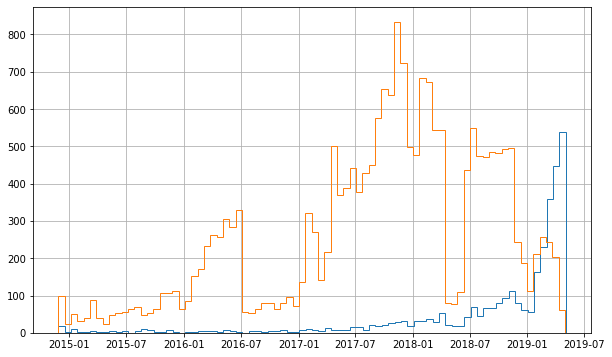

In [4]:
df['days_exposition'] = df[df['days_exposition'].notnull()]['days_exposition'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df[df['days_exposition'].isna()]['first_day_exposition'].hist(bins = 80, figsize = (10,6), histtype='step')
df[df['days_exposition'].notna()]['first_day_exposition'].hist(bins = 80, figsize = (10,6), histtype='step')





**Вывод:** Сравнивая гистограммы дат публикации объявлений для которых указаны сроки размещения с объявлениями для которых эти сроки не указаны можно сказать следующее: 
* Основная часть публикаций с отсутствующим 'days_exposition' приходится на конец 2019г, т.е. на конец исследования, а значит возможное появление основной части пустых значений в столбце 'days_exposition' это включение в таблицу объявлений по которым квартиры еще не проданы. 
* Для публикаций с присутствующими данными в 'days_exposition' видно что максимум приходится на конец 2017 начало 2018 года далее он сходит на "нет" что также подтверждает предыдущий тезис. 
*  В любом случае мы не можем не на что менять пустые значения.     

#### Столбец locality_name

Пропущенные значения в locality_name (их всего 49) трогать не будем, возможная причина - не внесены создателем объявления по невнимательности.

#### Столбец balcony

In [5]:
df['balcony'].unique()



array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Обычно при вводе данных заявитель не заполняет количество балконов если их нет. Исправим это и поменяем тип на int.

In [6]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

#### Столбец first_day_exposition

В столбце first_day_exposition необходимо изменить тип данных на datetime, но без времени, т.к. время не указано (везде 00:00:00)

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Столбец ceiling_height

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,NaN,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,NaN,...,NaN,0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,NaN,...,29.0,1,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,NaN,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.0,5,NaN,...,NaN,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,NaN,...,15.6,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,...,NaN,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


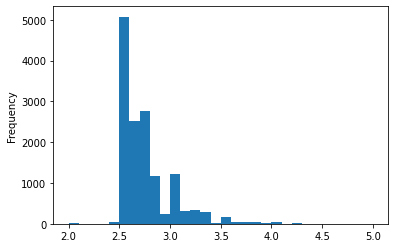

In [8]:
df['ceiling_height'].plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
print(df['ceiling_height'].unique())
display(df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(35))

Всего около 30 строк имеют необоснованно большие значения, причем значения от 20.0 до 32.0 вероятно возникли при ошибке в запятой при вводе данных. Поэтому заменим эти значения на порядок ниже, а значение 100 на медианное. Пропуски пока оставим.

In [9]:
median_ceiling_height = df['ceiling_height'].median()
i = -1
for value in df['ceiling_height']:
    i += 1
    if value >= 20:
        df.loc[i, 'ceiling_height'] = df.loc[i, 'ceiling_height'] / 10
        if value == 10:
            df.loc[i, 'ceiling_height'] = median_ceiling_height
        
display(df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(35)) 

        
    
    
    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17078,20,11500000.0,57.4,2017-07-24,1,4.25,6.0,37.5,3,NaN,...,5.6,0,Санкт-Петербург,21990.0,392.0,3.0,207.0,2.0,617.0,451.0
10754,8,9350000.0,74.0,2018-09-04,3,4.30,4.0,46.0,2,False,...,10.0,0,Санкт-Петербург,20468.0,2417.0,2.0,538.0,2.0,708.0,NaN
4201,9,8250000.0,84.2,2017-11-29,2,4.37,3.0,52.0,3,NaN,...,15.0,0,Санкт-Петербург,23959.0,4527.0,1.0,342.0,0.0,NaN,17.0
11651,1,8500000.0,135.0,2016-07-03,3,4.40,5.0,61.5,3,False,...,16.0,0,Санкт-Петербург,24844.0,4840.0,0.0,NaN,1.0,787.0,257.0
7274,16,43000000.0,280.0,2014-12-10,5,4.40,5.0,NaN,4,NaN,...,NaN,0,Санкт-Петербург,26711.0,5559.0,0.0,NaN,1.0,785.0,1065.0
6728,10,55000000.0,280.0,2018-03-22,7,4.40,6.0,195.0,5,NaN,...,22.0,1,Санкт-Петербург,32534.0,4725.0,0.0,NaN,2.0,594.0,406.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
7521,16,43500000.0,245.8,2015-12-17,3,4.45,7.0,170.8,7,True,...,25.0,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0
6802,15,7500000.0,69.0,2017-02-15,2,4.50,3.0,64.0,3,False,...,25.0,0,Санкт-Петербург,40326.0,15610.0,0.0,NaN,2.0,852.0,427.0
9783,13,37900000.0,220.0,2017-10-23,6,4.50,5.0,148.0,5,NaN,...,21.0,1,Санкт-Петербург,32534.0,4725.0,0.0,NaN,2.0,594.0,364.0


#### Столбец is_apartment

В столбеце is_apartment все пропущенные значения заменим на False, вероятное появление пустых значений связано либо с временем пояления данног столбца либо с не внесением данных составителем объявления при условии что объект недвижимости не является апартаментами. Поэтому заменим на Nan на False.

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Столбец last_price

В связи  стем что в цене на момент снятия с публикации везде 0 после запятой (0 копеек), можем для удобства просмотра изменим цену на тип int 

In [11]:
df['last_price'] = df['last_price'].astype('int')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Столбец floors_total

In [12]:
display(df[df['floors_total'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Всего 86 строк и ничего общего, оставим как есть.

#### Столбец living_area

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19,1,NaN,9.0,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5.0,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18,1,NaN,22.0,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12.0,NaN,5,False,...,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10.0,NaN,1,False,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9.0,NaN,2,False,...,NaN,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,NaN,9.0,NaN,4,False,...,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


<AxesSubplot:ylabel='Frequency'>

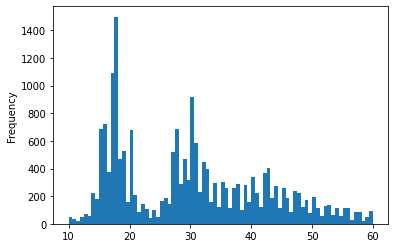

In [13]:
print(df['living_area'].value_counts())
display(df[df['living_area'].isna()])
df['living_area'].plot(y = 'living_area', kind = 'hist', bins = 80, range=(10,60))

Столбец жилая площадь в квадратных метрах имеет 1903 строки с пустыми значениями это около 7% всех данных. На гистограмме заметны пики это около 17 метров для однокомнатного жилья, 30 для двухкомнатного жилья и около 45 для трехкомнатного. Проверим.

In [14]:
k1 = (df[df['rooms'] == 1]['living_area'].median())
k2 = (df[df['rooms'] == 2]['living_area'].median())
k3 = (df[df['rooms'] == 3]['living_area'].median())
print(k1, k2, k3)

17.6 30.5 45.0


Отлично. Заменим пустые значения в столбце на около медианные для каждого типа квартиры используя при этом случайное отклонение по Гаусу от медианного значения в 30%, для того чтоб не укрупнять само колличество медианных значений и сохраний динамику данных.

18.000000    882
17.000000    675
30.000000    598
16.000000    486
20.000000    481
            ... 
28.882577      1
14.220000      1
16.175063      1
57.409072      1
16.740000      1
Name: living_area, Length: 3534, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


<AxesSubplot:ylabel='Frequency'>

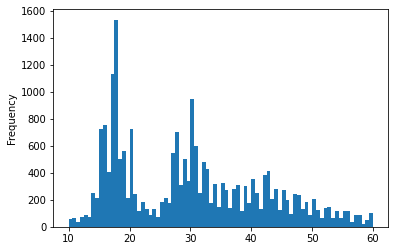

In [15]:

df['living_area'] = df['living_area'].fillna(0)
i = -1
for value in df['living_area']:
    r = rnd.gauss(1, 0.3) 
    i += 1
    if value == 0:
        if df.loc[i,'rooms'] == 1:
            df.loc[i, 'living_area'] = k1 * r
        elif df.loc[i,'rooms'] == 2:
            df.loc[i, 'living_area'] = k2 * r
        elif df.loc[i,'rooms'] == 3:
            df.loc[i, 'living_area'] = k3 * r
            

print(df['living_area'].value_counts())
display(df[df['living_area'].isna()])
df['living_area'].plot(y = 'living_area', kind = 'hist', bins = 80, range=(10,60))
   

Отлично. 7% данных учтены при этом и форма диаграммы и динамика данных остались прежние.

#### Столбец kitchen_area

In [16]:
df['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

Без аномалий

#### Столбец airports_nearest

In [17]:
df['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

Без аномалий

#### Столбец city_centers_nearest

In [18]:
df['city_centers_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: city_centers_nearest, Length: 7642, dtype: int64

Без аномалий

#### Столбец parks_around_3000

In [19]:
df['parks_around_3000'].value_counts()


0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around_3000, dtype: int64

Пустые значения обычно означают отсутствие парковки в радиусе 3 км либо нет данных о наличии парковки или объект недвижимости находится в пригороде или за городом, где наличие парковки не столь актуально. Для всех этиэ случаев можем заменить пропущенные значения на 0 и поменяем тип данных на int.

In [20]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype('int')
print(df['parks_around_3000'].value_counts())

0    15624
1     5681
2     1747
3      647
Name: parks_around_3000, dtype: int64


Исправлено

#### Столбец parks_nearest

In [21]:
df['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

Без аномалий

#### Столбец ponds_around_3000

In [22]:
print(df['ponds_around_3000'].value_counts())
df['ponds_around_3000'].unique()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around_3000, dtype: int64


array([ 2.,  0.,  3.,  1., nan])

Пустые значения обычно означают отсутствие водоемов в радиусе 3 км, т.к. размещающий это объявнение при отсутствии водоемов просто пропускает этот пункт. Поэтому заменим на 0 и поменяем тип данных на int.

In [23]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype('int')
print(df['ponds_around_3000'].value_counts())

0    14589
1     5717
2     1892
3     1501
Name: ponds_around_3000, dtype: int64


Исправлено

#### Столбец ponds_nearest

In [24]:
df['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

Без явных аномалий

In [25]:
display(df.head(10))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,54.167331,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,40.256062,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод:

1. Заменили пропуски в days_exposition на 0 и изменили тип данных на int.
2. Столбец locality_name оставили без изменений.
3. Исправили количество балконов на 0 и поменяли тип на int.
4. В столбце first_day_exposition необходимо изменить тип данных на datetime, но без времени, т.к. время не указано (везде 00:00:00)
5. В столбеце ceiling_height исправили 30 строк с необоснованно большими значениями. Пропуски пока оставили.
6. В столбеце is_apartment все пропущенные значения заменили на False.
7. В столбеце last_price в связи с тем что в цене на момент снятия с публикации везде 0 после запятой (0 копеек), изменили для удобства просмотра цену на тип int.
8. Столбец floors_total оставили без изменений.
9. Заменим пустые значения в столбце living_area на около медианные для каждого типа квартиры используя при этом случайное отклонение по Гаусу от медианного значения в 30%, для того чтоб не укрупнять само количество медианных значений и сохранили динамику данных.
10. Столбец kitchen_area оставили без изменений.
11. Столбец airports_nearest оставили без изменений.
12. Столбец city_centers_nearest оставили без изменений.
13. Столбец parks_around_3000 исправили. Заменили пропущенные значения на 0 и поменяем тип данных на int.
14. Столбец parks_nearest оставили без изменений.
15. Столбец ponds_around_3000 исправили. Заменили пропущенные значения на 0 и поменяем тип данных на int.
16. Столбец ponds_nearest оставили без изменений.
**Предобработка данных произведена**


## Расчёты и добавление результатов в таблицу

### Расчёты и добавление в таблицу цены квадратного метра

In [26]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')
df.info()
print(df['price_per_square_meter'].value_counts())
df = df.loc[df['price_per_square_meter'] > 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

Добавли в таблицу столбец price_per_square_meter с ценой квадратного метра и исбавились от одной строки с аномально низкой ценой.

### Расчёты и добавление в таблицу деня недели, месяца и года публикации объявления

In [27]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавли в таблицу столбец weekday_exposition с днем недели публикации, столбец month_exposition с месяцем публикации и столбец year_exposition с годом публикации объявления.

### Расчёты и добавление в таблицу этажа квартиры в виде категорий: первый, последний, другой.

In [28]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
     
df['floor_category'] = df.apply(floor_category, axis = 1)

С помощью функции добавили в таблицу столбец floor_category с категориями этажа квартиры в виде: первый, последний, другой.

### Расчёты и добавление в таблицу соотношения жилой и общей площади, а также отношение площади кухни к общей.

In [29]:
df['useful_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

Добавли в таблицу столбец useful_area_ratio с соотношением жилой и общей площади и столбец kitchen_area_ratio с отношением площади кухни к общей площади объекта недвижимости.

### Вывод:

**В этом пункте рассчитали и:**
* Добавли в таблицу столбец price_per_square_meter с ценой квадратного метра.
* Добавли в таблицу столбец weekday_exposition с днем недели публикации, столбец month_exposition с месяцем публикации и столбец year_exposition с годом публикации объявления.
* С помощью функции добавили в таблицу столбец floor_category с категориями этажа квартиры в виде: первый, последний, другой.
* Добавли в таблицу столбец useful_area_ratio с соотношением жилой и общей площади и столбец kitchen_area_ratio с отношением площади кухни к общей площади объекта недвижимости.

## Исследовательский анализ данных

### Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.

#### Изучаем площадь и строим гистограмму.

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

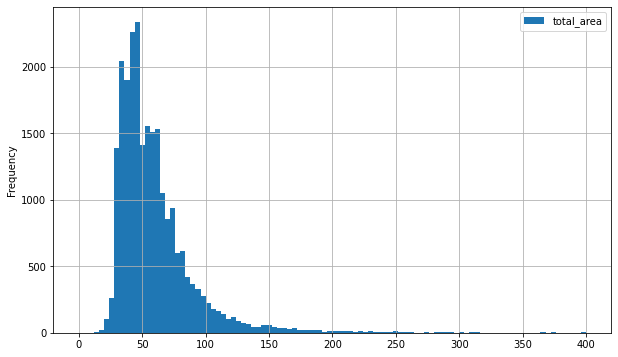

In [30]:

df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,400))
df['total_area'].describe()

С помошью describe получили общее представление о данных по площади. По гистограмме видно что распределение данных нормальное, есть выбросы но они не сильно влияют на данные.

#### Изучаем цену на момент снятия с публикации цену за квадратный метр и строим гистограмму.

count    23698.000000
mean         6.541824
std         10.887160
min          0.430000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64
count    23698.000000
mean        99.425401
std         50.303732
min          7.962000
25%         76.592500
50%         95.000000
75%        114.257500
max       1907.500000
Name: price_per_square_meter, dtype: float64


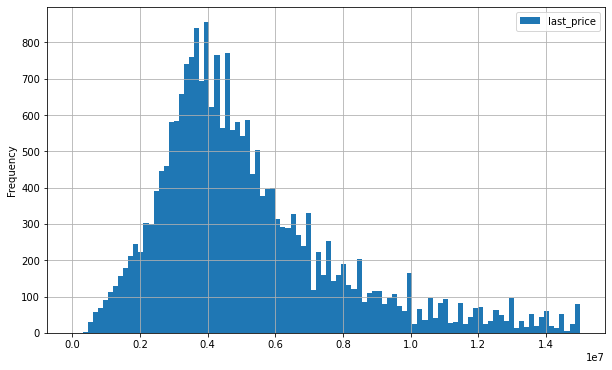

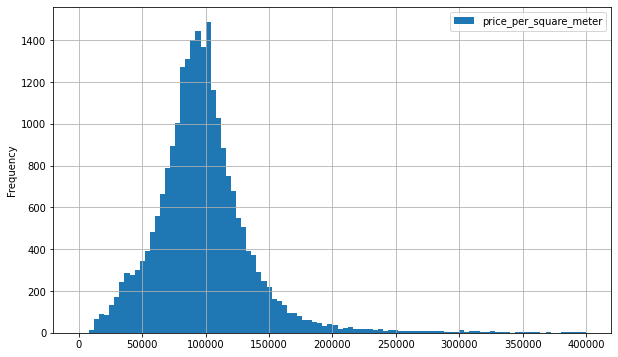

In [31]:

df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (10,6))
print((df['last_price'] / 1000000).describe())
df.plot(y = 'price_per_square_meter', kind = 'hist', bins = 100, grid=True, range = (0,400000), figsize = (10,6))
print((df['price_per_square_meter'] / 1000).describe())

С помошью describe получили общее представление о ценах квадратного метра. По гистограммах видно что распределение данных нормальное и выбросов почти нет.

#### Изучаем распределение цисла комнат и строим гистограмму.

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
1     8047
2     7939
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


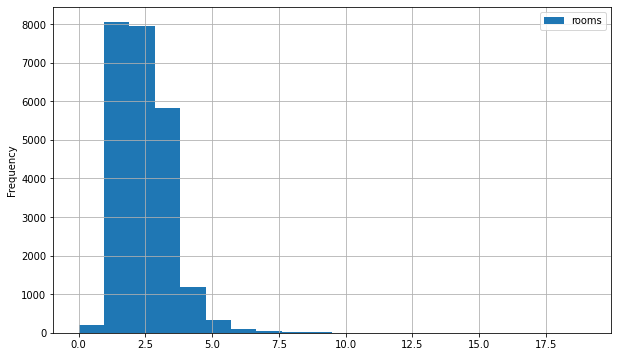

In [32]:
df.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (10,6))
print(df['rooms'].describe())
print(df['rooms'].value_counts())

С помошью describe получили общее представление о числе комнат. По гистограммах видно что распределение данных нормальное и выбросов нет.

#### Изучаем распределение высоты потолков и строим гистограмму.

count    14503.000000
mean         2.729606
std          0.319861
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64
2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
        ... 
2.26       1
3.43       1
1.00       1
2.34       1
4.65       1
Name: ceiling_height, Length: 176, dtype: int64


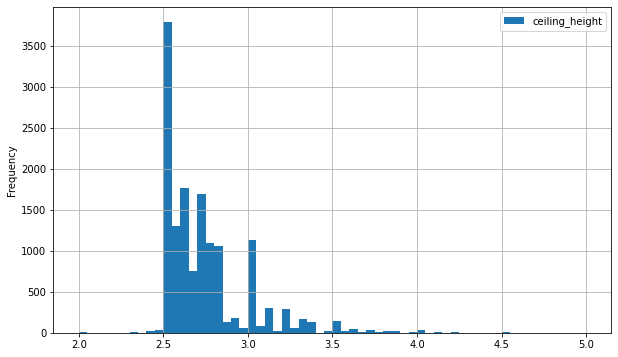

In [33]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 60, range = (2,5), grid=True, figsize = (10,6))
print(df['ceiling_height'].describe())
print(df['ceiling_height'].value_counts())


С помошью describe получили общее представление о высоте потолков. По гистограмме видно что распределение данных нормальное, есть выбросы и они влияют на данные. Есть ожидаемые пики в стандартных значениях для объектов недвижимости.

#### Вывод:

1. Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных соответствует распределению Гаусса.
2. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса. Цена за квадратный метр недвижимость начинается от 8000 руб, среднее значение цены 100000 руб, медиана 95000 руб и это говорит о незначительном разбросе цены. Распределение данных Гаусса.
3. Количество комнат колеблется от 1 до 19. Больше всего однокомнатных и двухкомнатных квартир.
4. Высота потолков в среднем составляет 2,7 м, медиана 2,65 м. Как и ожидалось есть сосредоточение на стандартных высотах таких как 2.5, 2.6 и 2.7 это связано с нормами строительства и отсутствия измерения перед публикацией объявления.

### Изучаем время продажи квартиры.

#### Строим гистограмму. Считаем среднее и медиану.

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1349.0      1
1228.0      1
1363.0      1
1084.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64


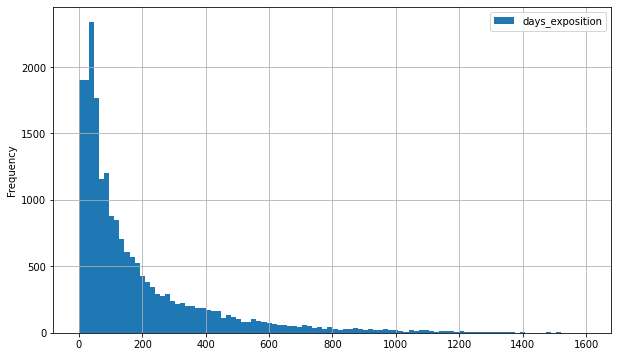

In [34]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,1600), figsize = (10,6))
print(df['days_exposition'].describe())
print(df['days_exposition'].value_counts())


#### Вывод:

Продажа квартиры в среднем занимает около двух месяцев. Соответственно если продажа произошла за два месяца это довольно быстро, если больше будем считать что это медленно. Также стоит отметить что значительная часть квартир около 13% продается сразу в день публикации, но есть и очень долгие и редкие продажи с временем 3-4 года.Основная часть квартир продается за 6 месяцев. 

### Убираем редкие и выбивающиеся значения.

#### Ищем убираем редкие и выбивающиеся значения

In [35]:
sort_days_exposition = (df.pivot_table(index='days_exposition', values='last_price', aggfunc='count')
                          .sort_values(by='last_price', ascending=False).reset_index())
display(sort_days_exposition.head(10))


,days_exposition,last_price
0,45.0,880
1,60.0,538
2,7.0,234
3,30.0,208
4,90.0,204
5,4.0,176
6,3.0,158
7,5.0,152
8,14.0,148
9,9.0,143


Убираем редкие и выбивающиеся значения это: 0, 45, 60 и все что больше 600.

<AxesSubplot:ylabel='Frequency'>

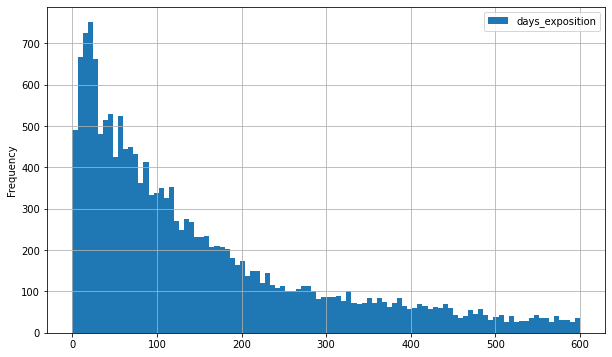

In [36]:
df = df.query('days_exposition <= 600')
df = df.query('days_exposition not in [0, 7, 30, 45, 60, 90]')
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,600), figsize = (10,6))

#### Вывод:

После того как убрали редкие и выбивающиеся значения это: 0, 7, 30, 45, 60, 90 и все что больше 600. Обнаружилось что гистограмма стала похожа на нормальное распределение Гауса. И чем больше значений в датафрейме тем плавнее будет это распределение и меньше выбивающиеся значений. 

### Ищем факторы, больше всего влияющие на стоимость квартиры.

#### Изучим зависимость цены квадратного метра от удалённости от центра.

Посмотрим на гистограмму столбца city_centers_nearest

<AxesSubplot:ylabel='Frequency'>

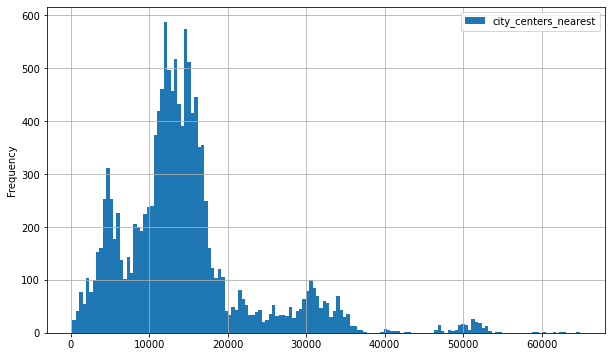

In [37]:
df.plot(y = 'city_centers_nearest', kind = 'hist', bins = 150, grid=True, figsize = (10,6))

Видны незначительные выбросы и есть желание категорировать удаленность от центра и добавить столбец category_ceiling_height с категориями. 

In [38]:
def category_ceiling_height(row):
    if row['city_centers_nearest'] < 2000:
        return 'самый центр'
    elif row['city_centers_nearest'] < 5000:
        return 'центр'
    elif row['city_centers_nearest'] < 10000:
        return 'в пределах 10км от центра'
    elif row['city_centers_nearest'] < 20000:
        return 'в пределах города'
    elif row['city_centers_nearest'] >= 20000:
        return 'область'

df['category_ceiling_heigh'] = df.apply(category_ceiling_height, axis=1)

display(df[['locality_name', 'city_centers_nearest', 'category_ceiling_heigh']].head(10))

,locality_name,city_centers_nearest,category_ceiling_heigh
1,посёлок Шушары,18603.0,в пределах города
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,в пределах 10км от центра
4,Санкт-Петербург,8098.0,в пределах 10км от центра
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,в пределах города
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города
10,Санкт-Петербург,13878.0,в пределах города
13,Петергоф,33058.0,область


Строим график зависимости изменения медианы цены квадратного метра от расстояния от центра

<AxesSubplot:xlabel='category_ceiling_heigh'>

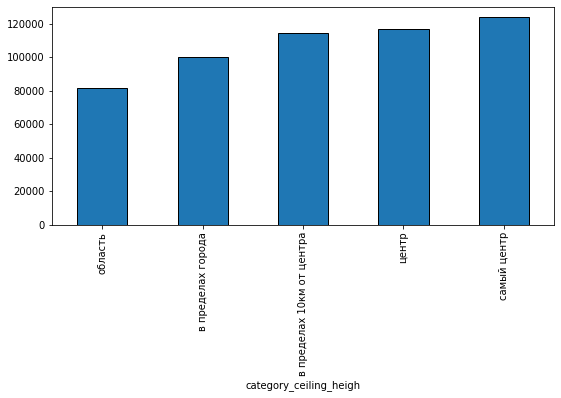

In [39]:
df_filtered = (df.groupby('category_ceiling_heigh')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(by='price_per_square_meter'))
            
df_filtered.plot(x='category_ceiling_heigh'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , legend=None
                 , fontsize=10
                 , figsize=(9,4))


**Вывод:** Есть явная зависимость стоимости квадратного метра от удалённости от центра. Чем ближе к центру, тем выше стоимость.

#### Изучим зависимость цены квадратного метра от общей площади квартиры.

 Посмотрим на гистограмму столбца total_area

count    17255.000000
mean        58.339226
std         33.692439
min         12.000000
25%         39.200000
50%         50.200000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64


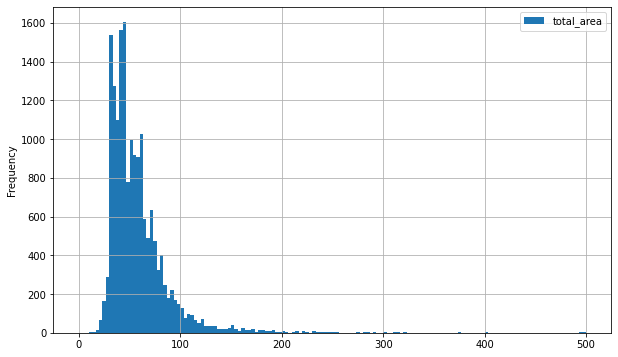

In [40]:
df.plot(y = 'total_area', kind = 'hist', bins = 150, grid=True, figsize = (10,6), range = (0,500))
print(df['total_area'].describe())

Уберем из анализа квартиры с площадью более 200 метров, т. к. из-за их малого количества выборка не является репрезентативной.
Что бы сохранить влияние количества комнат на остальные данные сгруппируем стоимость цены квадратного метра и площадь по колличеству комнат и построить зависимость площади квартиры на цену квадратного метра.

<AxesSubplot:xlabel='total_area'>

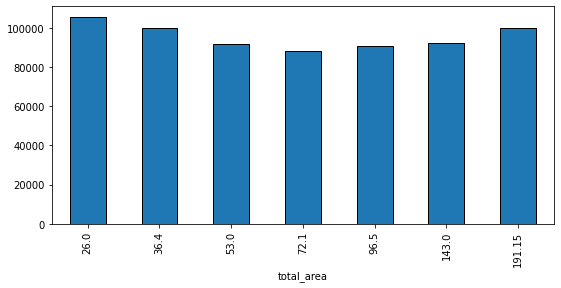

In [41]:
df_filtered_area_by_rooms = (df.groupby('rooms')
                 .median()['total_area']
                 .reset_index()
                 .sort_values(by='rooms'))

df_filtered_square_meter_by_rooms = (df.groupby('rooms')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(by='rooms'))

df_filtered_square_meter_by_rooms['total_area'] = df_filtered_area_by_rooms['total_area']

df_filtered_square_meter_by_rooms.sort_values(by='total_area') \
                                 .query('total_area <= 200') \
                                 .plot(x='total_area'
                                     , y='price_per_square_meter'
                                     , kind='bar'
                                     , ec='black' 
                                     , legend=None
                                     , fontsize=10
                                     , figsize=(9,4))



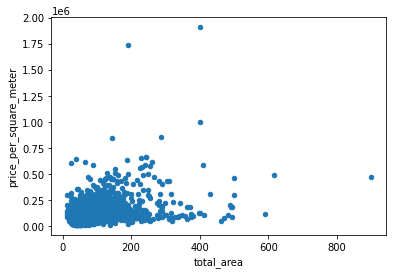

<AxesSubplot:xlabel='total_area'>

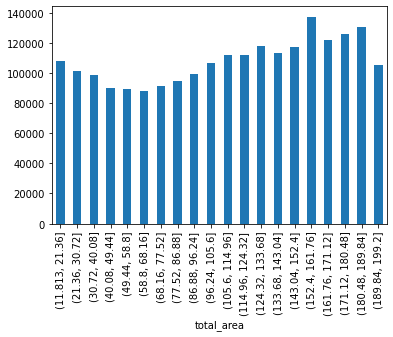

In [42]:
# код реьвюера

df.plot(kind='scatter', x='total_area', y='price_per_square_meter')
plt.show()

df[df['total_area'] < 200].groupby(pd.cut(df[df['total_area'] < 200]['total_area'], bins=20))['price_per_square_meter'].median().plot(kind='bar')

**Вывод:** Чем больше квартира, тем меньшее стоимость квадратного метра. Такая динамика сохраняется вплоть до площадей около 72 м2 и соответственно  3-х комнатных квартир. Далее при увеличении площади для квартир с площадью более 70 - 80 м2 цена постепенно возрастает и соответственно это квартиры имею более 3 комнат и видимо являются уже "премиум класса"   

#### Изучим зависимость цены квадратного метра от числа комнат.

count    17255.000000
mean         2.010142
std          1.040705
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:ylabel='Frequency'>

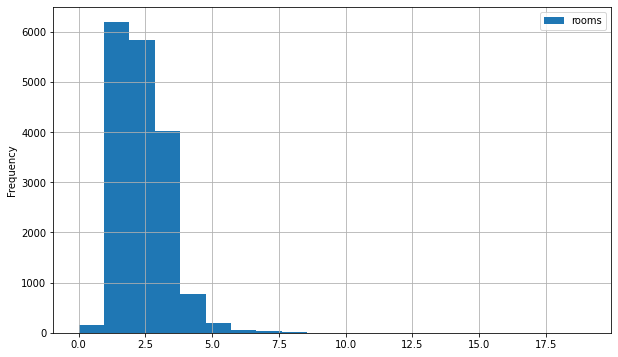

In [43]:
print(df['rooms'].describe())
df.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (10,6))


Используем данные из предыдущего пункта, при этом исключим из исследования квартиры с 7 и более комнатами из-зи их малого представления в данных.

<AxesSubplot:xlabel='rooms'>

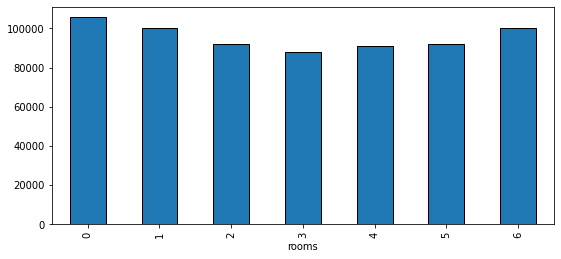

In [44]:
df_filtered_square_meter_by_rooms.sort_values(by='rooms') \
                                 .query('rooms <= 6') \
                                 .plot(x='rooms'
                                     , y='price_per_square_meter'
                                     , kind='bar'
                                     , ec='black' 
                                     , legend=None
                                     , fontsize=10
                                     , figsize=(9,4))

**Вывод:** На гистограмме хорошо видно, что цена за квадратный метр цена уменьшается если количество комнат увеличивается от нуля до трех и увеличивается от трех до больших значений числа комнат в данном случае до 6 комнат (в соответствии с выбранном нами репрезентативным диапазоном рассмотрения количества комнат).

#### Изучим зависимость цены квадратного метра от этажа.

,mean,count,median
floor_category,,,
другой,101691.015012,12790,97058
первый,80754.728467,2055,80939
последний,93199.622279,2343,88172


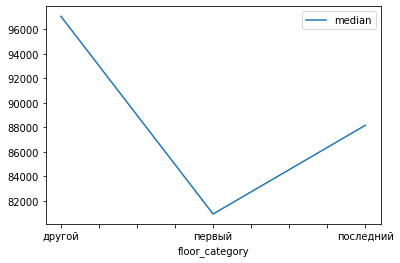

In [45]:
floor_category = (df.pivot_table(index = 'floor_category'
                             , values = 'price_per_square_meter'
                            , aggfunc = ['mean', 'count', 'median']))
floor_category.columns = ['mean', 'count', 'median']
floor_category.plot(y = 'median')
display(floor_category)

**Вывод:** Согласно расчету и это видно на графике Самые дешевые квартиры на первом этаже, четь дороже на последнем и соответственно на средних этажах с категорией "другие" самые дорогие квартиры. Есть зависимость цены квадратного метра от этажа.

#### Изучим зависимость  от даты размещения: дня недели, месяца и года.

Построим график зависимости медианной цены за квадратный метр и за квартиру целиком от дня недели, месяца и года публикации объявления.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,category_ceiling_heigh,day_of_the_week
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,81.0,82920,1,12,2018,первый,0.460396,0.272277,в пределах города,2-Вторник
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,558.0,92785,3,8,2015,другой,0.612500,0.148214,в пределах города,4-Четверг
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,54.167331,9,False,...,424.0,408176,4,7,2015,другой,0.340675,NaN,в пределах 10км от центра,5-Пятница
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,121.0,100000,1,6,2018,другой,0.320000,0.410000,в пределах 10км от центра,2-Вторник
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.400000,5,False,...,55.0,95065,0,9,2018,другой,0.473684,0.299342,None,1-Понедельник


<AxesSubplot:xlabel='day_of_the_week'>

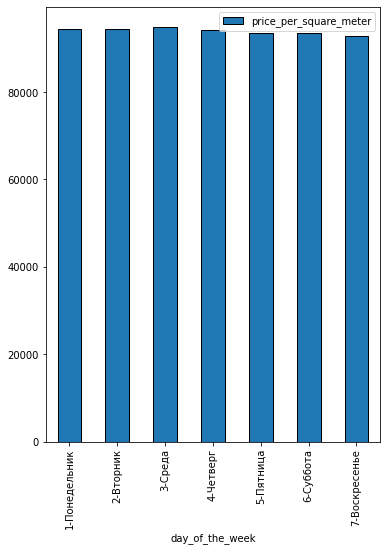

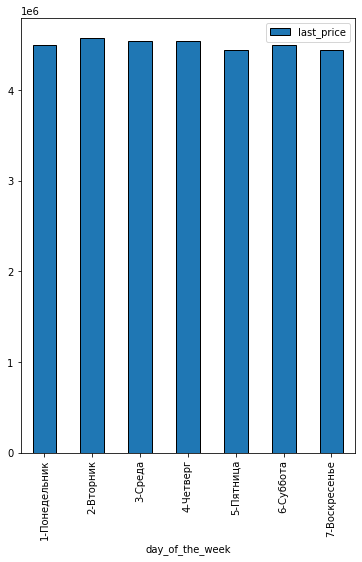

In [46]:
def day(row):
    d = row['weekday_exposition']
    if d == 0:
        return '1-Понедельник'
    elif d == 1:
        return '2-Вторник'
    elif d == 2:
        return '3-Среда'
    elif d == 3:
        return '4-Четверг'
    elif d == 4:
        return '5-Пятница'
    elif d == 5:
        return '6-Суббота'    
    elif d == 6:
        return '7-Воскресенье'  

df['day_of_the_week'] = df.apply(day, axis=1)
display(df.head())


df_filtered_day = (df.groupby('day_of_the_week')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='day_of_the_week'))
            
df_filtered_day.plot(x='day_of_the_week'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))

df_filtered_day_last = (df.groupby('day_of_the_week')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='day_of_the_week'))
            
df_filtered_day_last.plot(x='day_of_the_week'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))



**Вывод:** Зависимости цены квадратного метра или стоимости квартиры от дня недели публикации практически нет. Единственное, что можно сказать, что в среднем цены за квадратный метр квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена за квадратный метр квартиры с объявлениями, опубликованными в выходные дни.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,category_ceiling_heigh,day_of_the_week,publication_month
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,82920,1,12,2018,первый,0.460396,0.272277,в пределах города,2-Вторник,12
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,92785,3,8,2015,другой,0.612500,0.148214,в пределах города,4-Четверг,08
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,54.167331,9,False,...,408176,4,7,2015,другой,0.340675,NaN,в пределах 10км от центра,5-Пятница,07
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,100000,1,6,2018,другой,0.320000,0.410000,в пределах 10км от центра,2-Вторник,06
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.400000,5,False,...,95065,0,9,2018,другой,0.473684,0.299342,None,1-Понедельник,09


<AxesSubplot:xlabel='publication_month'>

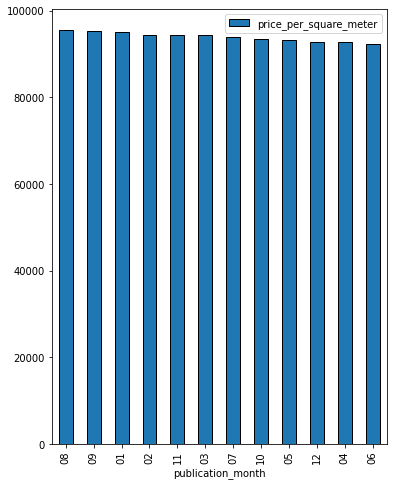

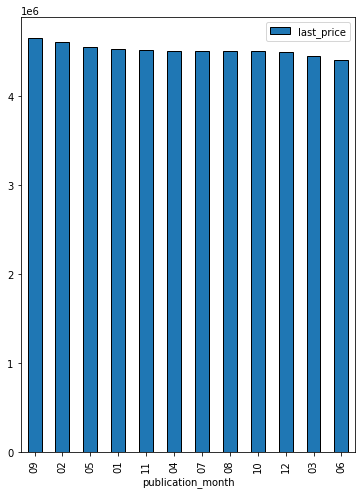

In [47]:
def month(row):
    d = row['first_day_exposition']
    m = str(d)[5:7]
    return m
 

df['publication_month'] = df.apply(month, axis=1)
display(df.head())

df_filtered_month = (df.groupby('publication_month')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=False, by='price_per_square_meter'))
            
df_filtered_month.plot(x='publication_month'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))

df_filtered_month_last = (df.groupby('publication_month')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=False, by='last_price'))
            
df_filtered_month_last.plot(x='publication_month'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))


**Вывод:** Зависимости цены квадратного метра или стоимости квартиры от месяца публикации практически нет. Единственное, что можно сказать, что в среднем цены за квадратный метр квартиры да и стоимость квартиры, объявление о продажи которых опубликовано в начале лета, чуть ниже, чем цена за квадратный метр квартиры с объявлениями, опубликованными в конце лета и начале осени.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,category_ceiling_heigh,day_of_the_week,publication_month,publication_year
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,1,12,2018,первый,0.460396,0.272277,в пределах города,2-Вторник,12,18
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,3,8,2015,другой,0.612500,0.148214,в пределах города,4-Четверг,08,15
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,54.167331,9,False,...,4,7,2015,другой,0.340675,NaN,в пределах 10км от центра,5-Пятница,07,15
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1,6,2018,другой,0.320000,0.410000,в пределах 10км от центра,2-Вторник,06,18
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.400000,5,False,...,0,9,2018,другой,0.473684,0.299342,None,1-Понедельник,09,18


<AxesSubplot:xlabel='publication_year'>

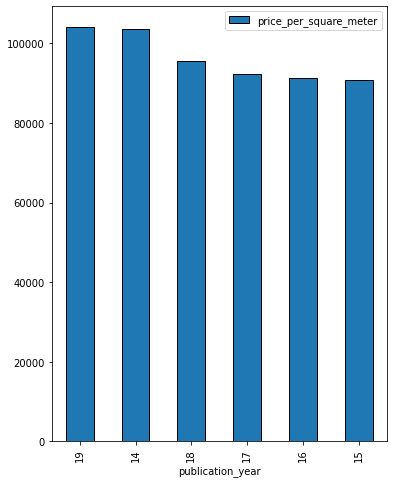

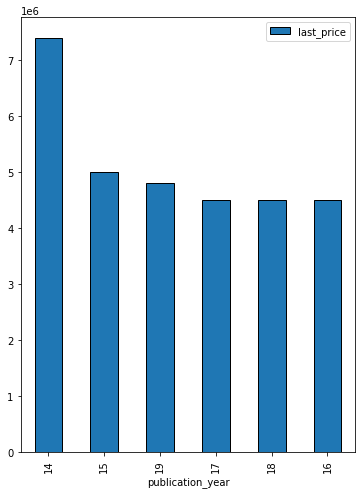

In [48]:
def month(row):
    d = row['first_day_exposition']
    m = str(d)[2:4]
    return m
 

df['publication_year'] = df.apply(month, axis=1)
display(df.head())

df_filtered_year = (df.groupby('publication_year')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=False, by='price_per_square_meter'))
            
df_filtered_year.plot(x='publication_year'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))

df_filtered_year_last = (df.groupby('publication_year')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=False, by='last_price'))
            
df_filtered_year_last.plot(x='publication_year'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(6,8))

**Вывод:** Конечно есть большое влияние года продажи квартиры на её стоимость и на стоимость квадратного метра жилья. Цена за квадратный метр была самой высокой в 19 и 14 году, а самая большая стоимость квартир была в 19 году. 

#### Выбераем 10 населённых пунктов с наибольшим числом объявлений.

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [49]:
locality_pivot_table = (df.pivot_table(index = 'locality_name'
                                         , values = 'price_per_square_meter'
                                         , aggfunc=['count', 'mean']))
locality_pivot_table.columns = ['count', 'mean']
display(locality_pivot_table.sort_values('count', ascending = False).head(10))



,count,mean
locality_name,,
Санкт-Петербург,11573,111756.158386
посёлок Мурино,450,85817.766667
посёлок Шушары,345,78169.808696
Всеволожск,284,68694.316901
Колпино,264,74981.662879
Пушкин,263,102540.365019
посёлок Парголово,252,89549.603175
деревня Кудрово,242,92477.012397
Гатчина,223,67496.017937


**Вывод:** Из 10 населённых пунктов самая высокая стоимость жилья, с самым большим количеством объявлений, в Санкт-Петербурге, а самая низкая стоимость в Выборге.

#### Изучите предложения квартир

где для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Постром график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

,price_per_square_meter
city_centers_nearest_km,
0,166108.868852
1,157679.293706
2,147609.861244
3,125682.804154
4,135567.896104
5,144474.730097
6,141402.274143
7,143555.224080
8,117618.283871


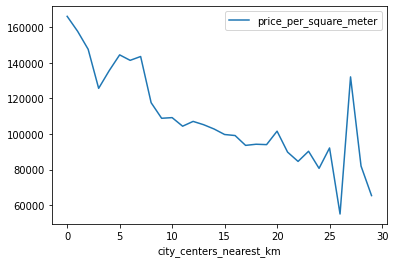

In [50]:
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].fillna(111111)
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].astype('int')
pivot_table_km = (df.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km !=111111')
                    .pivot_table(index = 'city_centers_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
                    )
pivot_table_km.plot()
display(pivot_table_km)

**Вывод:** Cудя по графику, где происходит сильное изменение, центр будет с радиусом около 5 километров.

#### Выделяем сегмент квартир в центре.

Необходимо проанализировать территорию в центре и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

Высота потолков

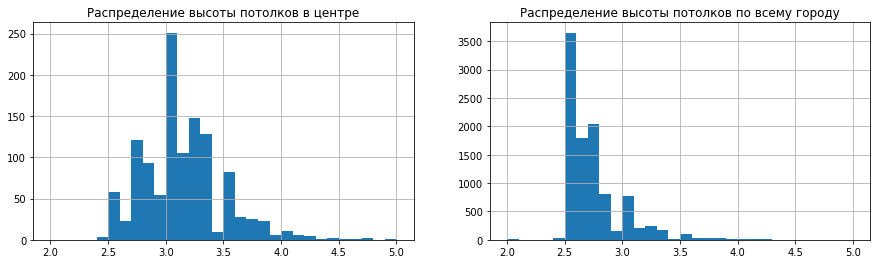

In [51]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df.query('city_centers_nearest_km <= 5 and locality_name == "Санкт-Петербург"')['ceiling_height'].hist(bins=30, ax=axes[0], range=(2,5))
df['ceiling_height'].hist(bins=30, ax=axes[1], range=(2,5))

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

Цена квартиры на момент снятия с публикации

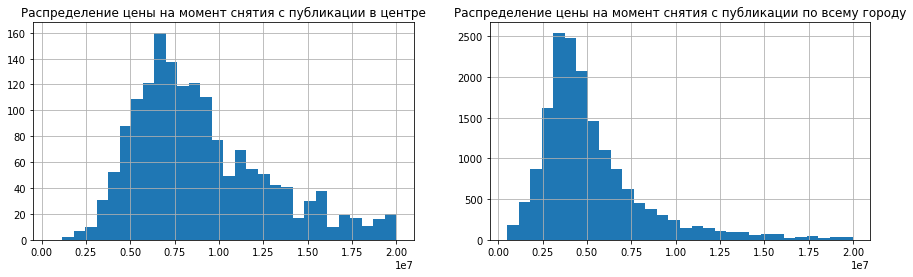

In [52]:

fig, axes = plt.subplots(1,2,figsize=(15,4))

df.query('city_centers_nearest_km <= 5 and locality_name == "Санкт-Петербург"')['last_price'].hist(bins=30, ax=axes[0], range=(500000,20000000))
df['last_price'].hist(bins=30, ax=axes[1], range=(500000,20000000))

axes[0].set_title('Распределение цены на момент снятия с публикации в центре')
axes[1].set_title('Распределение цены на момент снятия с публикации по всему городу')

plt.show()

Общая площадь квартиры в квадратных метрах (м²)

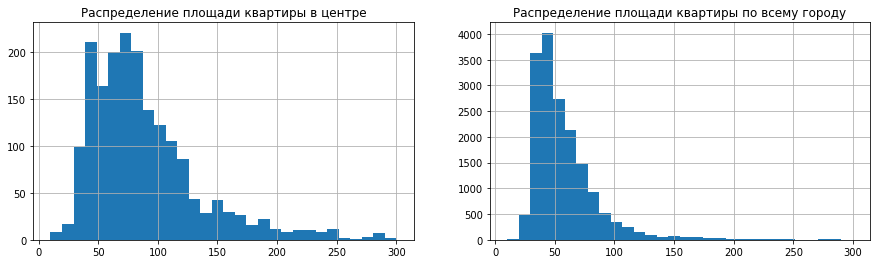

In [53]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df.query('city_centers_nearest_km <= 5 and locality_name == "Санкт-Петербург"')['total_area'].hist(bins=30, ax=axes[0], range=(10,300))
df['total_area'].hist(bins=30, ax=axes[1], range=(10,300))

axes[0].set_title('Распределение площади квартиры в центре')
axes[1].set_title('Распределение площади квартиры по всему городу')

plt.show()

Число комнат в квартире

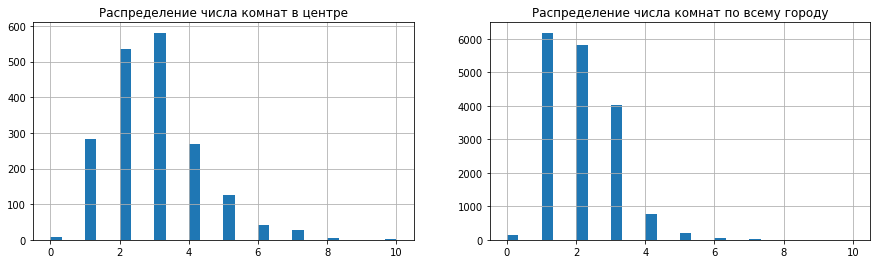

In [54]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df.query('city_centers_nearest_km <= 5 and locality_name == "Санкт-Петербург"')['rooms'].hist(bins=30, ax=axes[0], range=(0,10))
df['rooms'].hist(bins=30, ax=axes[1], range=(0,10))

axes[0].set_title('Распределение числа комнат в центре')
axes[1].set_title('Распределение числа комнат по всему городу')

plt.show()

**Вывод:** Сравнивая квартиры в центре города и по всему городу можно сказать следующее:
*  В центре города мы очень часто будем встречать потолки высотой 3 метра, напротив, по городу в среднем это значение будет 2,5 метра. И это связано с тем что в основном новые квартиры с нынешними нормами в 2.5 метра строятся на свободных территориях т. е.  в пригороде.
*  Квартиры в центре более дорогие и более широко представлен их ценовой диапазон. В остальной части города квартиры дешевле.
*  Квартиры в центре чуть больше и более широко представлен их диапазон площади. В остальной части города квартиры как правило небольшие и связанно это, наверное, с миграцией не богатого населения в крупные города.
*  Распределение по числу комнат в центре и по всему городу показывает, что в центре в основном двух- и трехкомнатные квартиры, а за центром одна- и двухкомнатные.

Также выделим факторы, которые влияют на стоимость квартиры.

<AxesSubplot:>

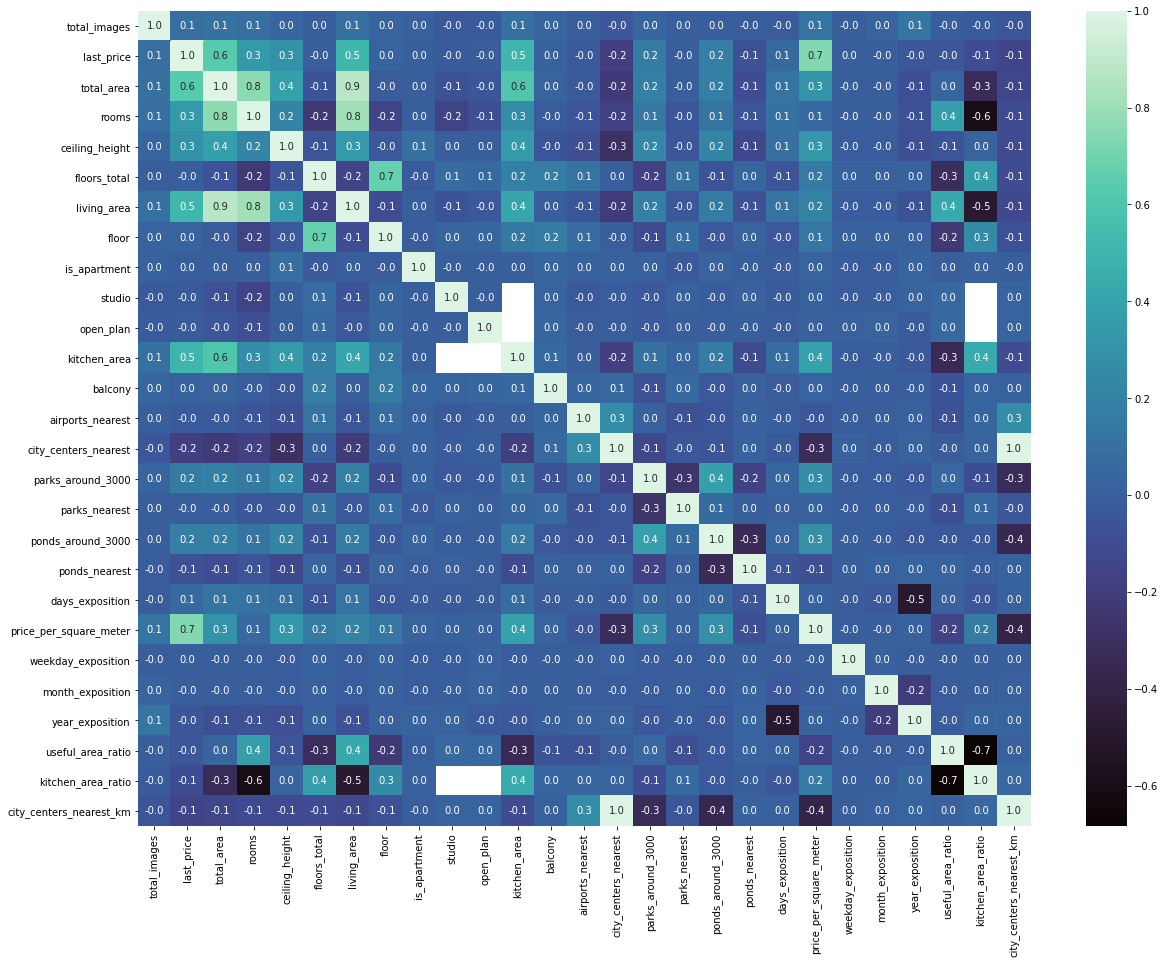

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="mako", fmt='.1f')

Рассмотрм  только столбец last_price:

<AxesSubplot:>

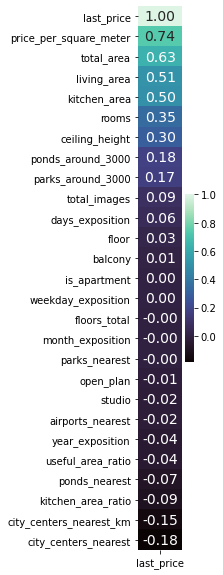

In [56]:
plt.figure(figsize=(1,10))
sns.heatmap(df.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="mako", 
            annot=True, annot_kws={'size':14}, fmt='.2f')

**Вывод:**
*  Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от размера жилой площади и площади кухни, а также от количества комнат и высоты потолков. Небольшое влияние оказывает присутствие парков и водоемов рядом.
*  Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена.
*  Многие параметры оказывают довольно слабое влияние, но возможно их совокупность может оказывать заметное влияние на цену квартиры.

### Рассмотрим влияние на стоимость квартиры параметров не имеющих корреляцию со стоимостью, либо имеющие минимальную корреляцию.
(total_images, floor, balcony, is_apartment, weekday_exposition, floors_total, month_exposition, parks_nearest, open_plan, airports_nearest, useful_area_ratio, year_exposition, ponds_nearest, kitchen_area_ratio)

#### Параметр total_images

<AxesSubplot:>

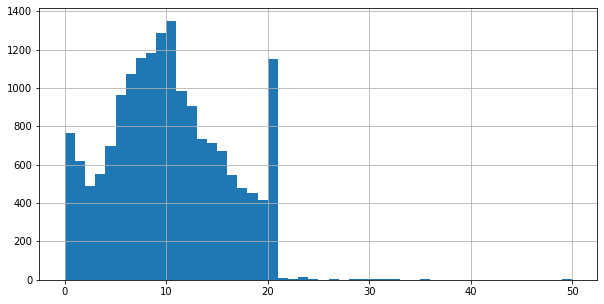

In [59]:
df['total_images'].sort_values(ascending=True).hist(bins=50, range=(0,50), figsize=(10,5))

Значения меннее 21 не репрезентативны.

<AxesSubplot:xlabel='total_images'>

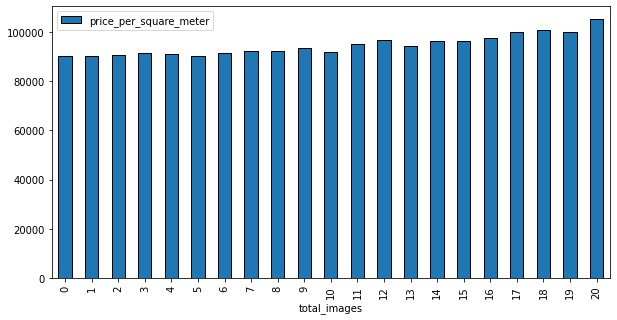

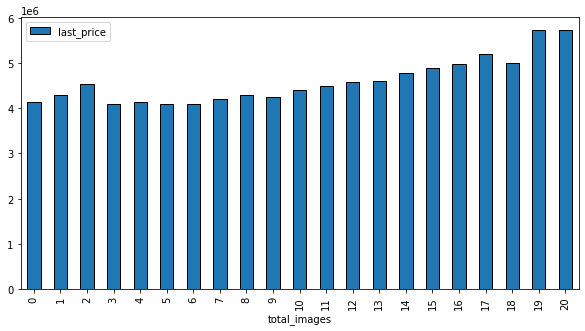

In [60]:
df_filtered_total_images = (df.query('total_images <= 20').groupby('total_images')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='total_images'))

            
df_filtered_total_images.plot(x='total_images'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5))


df_filtered_total_images_last = (df.query('total_images <= 20').groupby('total_images')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='total_images'))
            
df_filtered_total_images_last.plot(x='total_images'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5))

**Вывод:** Количество фотографий в объявлении значительно влияет на стоимость квартиры на цену квадратного метра. Чем больше фотографий, тем дороже квартира и больше цена квадратного метра.

#### Параметр floor

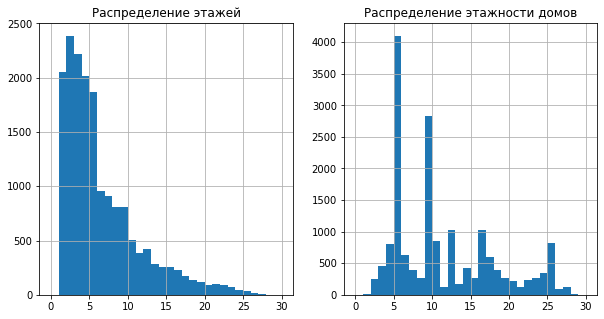

In [61]:

fig, axes = plt.subplots(1,2,figsize=(15,4))

df['floor'].sort_values(ascending=True).hist(bins=30, ax=axes[0], range=(0,30), figsize=(10,5))
df['floors_total'].sort_values(ascending=True).hist(bins=30, ax=axes[1], range=(0,30), figsize=(10,5))

axes[0].set_title('Распределение этажей')
axes[1].set_title('Распределение этажности домов')

plt.show()

Сравнивать стоимость квартиры, например, на втором этаже в пятиэтажке и семнадцатиэтажке будет не корректно, поэтому создадим следующие категории: малоэтажки - дома с пятью этажами и меньше, многоэтажки - дома от 6 до 9 этажей и высотки - дома свыше 9 этажей.

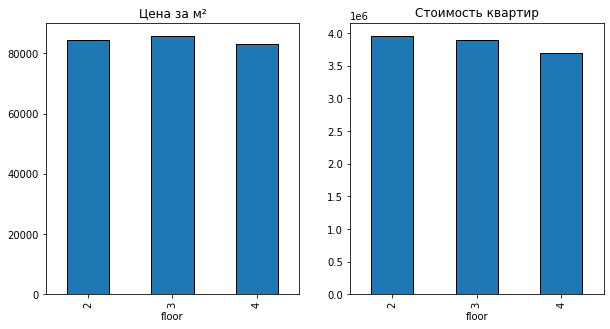

In [62]:
def floors_total_category(row):
    floor = row['floors_total']
    if floor <= 5:
        return 'малоэтажка'
    elif floor <= 9:
        return 'многоэтажка'
    elif floor > 9:
        return 'высотка' 

df['floors_total_category'] = df.apply(floors_total_category, axis=1)

fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.query('floor != 1 and floors_total_category == "малоэтажка" and floor != floors_total').groupby('floor')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))

df_filtered_total_images.plot(x='floor'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.query('floor != 1 and floors_total_category == "малоэтажка" and floor != floors_total').groupby('floor')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))
            
df_filtered_total_images_last.plot(x='floor'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()


**Вывод:** Среди домов до 5 этажей включительно сравнивая средние этажи можно сказать что цена за м² не сильно отличается и подороже считается цена м² для квартир на 3 этаже. Стоимость квартир также отличается не значительно и самые дорогие квартиры на 2 и 3 этажах. 

Text(0.5, 1.0, 'Стоимость квартир')

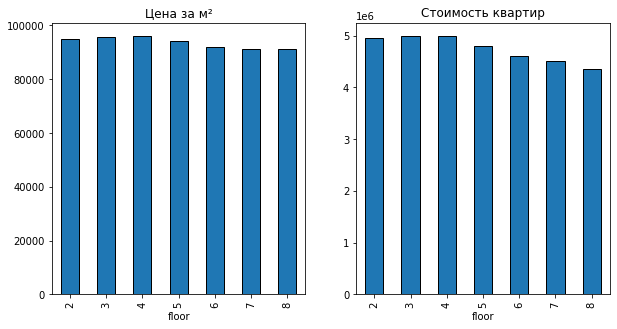

In [63]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.query('floor != 1 and floors_total_category == "многоэтажка" and floor != floors_total').groupby('floor')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))

df_filtered_total_images.plot(x='floor'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.query('floor != 1 and floors_total_category == "многоэтажка" and floor != floors_total').groupby('floor')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))
            
df_filtered_total_images_last.plot(x='floor'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

**Вывод:** Среди домов до 9 этажей включительно сравнивая средние этажи можно сказать что цена за м² не сильно отличается и подороже считается цена м² для квартир на 2, 3 и 4 этажах. Стоимость квартир отличается более значительно и самые дорогие квартиры на 2,3 и 4 этажах, далее при увеличении этажа стоимость квартир снижается. 

Text(0.5, 1.0, 'Стоимость квартир')

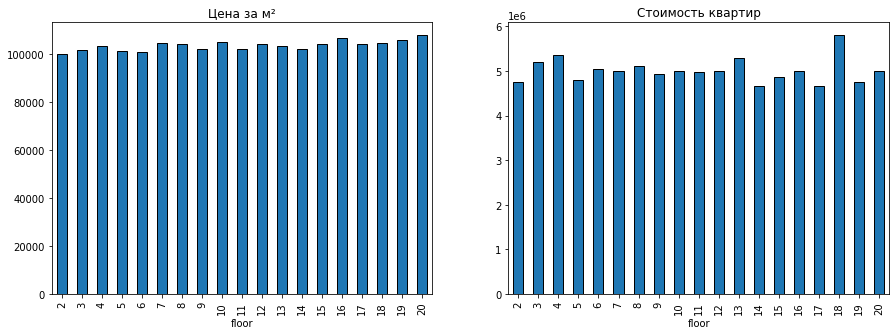

In [64]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.query('floor != 1 and floors_total_category == "высотка" and floor != floors_total and floor <= 20' ).groupby('floor')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))

df_filtered_total_images.plot(x='floor'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(15,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.query('floor != 1 and floors_total_category == "высотка" and floor != floors_total and floor <= 20').groupby('floor')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='floor'))
            
df_filtered_total_images_last.plot(x='floor'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(15,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

**Вывод:** Для домов свыше 9 этажей цена за м² практически не зависит от этажа, можно сказать что при увеличении этажа стоимость м² увеличивается совсем не значительно, при этом на стоимость квартир это не влияет или влияет не значительно.

#### Параметр balcony

<AxesSubplot:>

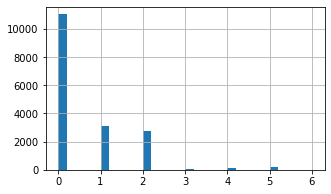

In [65]:
df['balcony'].sort_values(ascending=True).hist(bins=30, range=(0,6), figsize=(5,3))

Text(0.5, 1.0, 'Стоимость квартир')

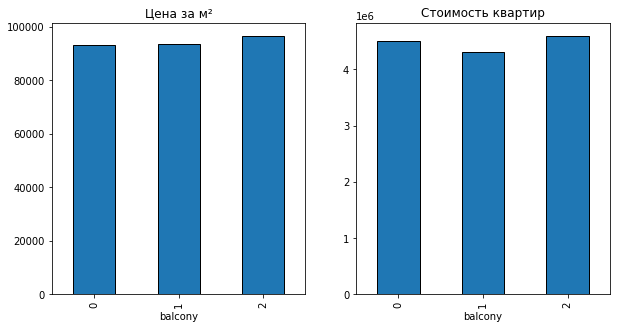

In [66]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_balcony = (df.query('balcony <= 2').groupby('balcony')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='balcony'))

            
df_filtered_balcony.plot(x='balcony'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)


df_filtered_balcony_last = (df.query('balcony <= 2').groupby('balcony')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='balcony'))
            
df_filtered_balcony_last.plot(x='balcony'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

**Вывод:** Цена за м² увеличивается не значительно при увеличении числа балконов, при этом на стоимость квартир это влияет следующим образом: при одном балконе стоимость ниже, чем при двух балконах или без балконов.   

#### Пераметр is_apartment

Text(0.5, 1.0, 'Стоимость квартир')

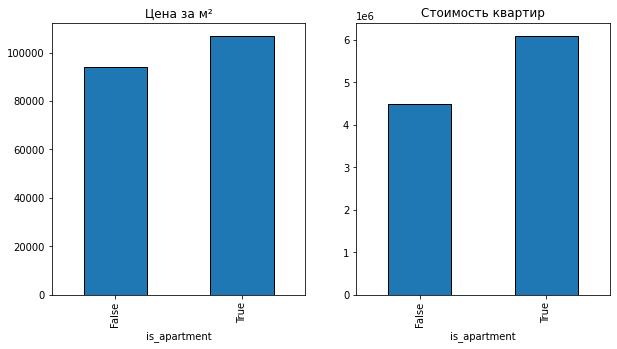

In [67]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_balcony = (df.groupby('is_apartment')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='is_apartment'))

            
df_filtered_balcony.plot(x='is_apartment'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)


df_filtered_balcony_last = (df.groupby('is_apartment')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='is_apartment'))
            
df_filtered_balcony_last.plot(x='is_apartment'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

**Вывод:** Цена за м² увеличивается, если квартира является апартаментами, при этом стоимость квартиры увеличивается значительно.  

#### Зависимость от даты размещения: дня недели, месяца и года рассмотренно в п. 5.13.1, ниже выводы.

**Вывод:** 
* Зависимости цены квадратного метра или стоимости квартиры от дня недели публикации практически нет. Единственное, что можно сказать, что в среднем цены за квадратный метр квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена за квадратный метр квартиры с объявлениями, опубликованными в выходные дни.
* Зависимости цены квадратного метра или стоимости квартиры от месяца публикации практически нет. Единственное, что можно сказать, что в среднем цены за квадратный метр квартиры да и стоимость квартиры, объявление о продажи которых опубликовано в начале лета, чуть ниже, чем цена за квадратный метр квартиры с объявлениями, опубликованными в конце лета и начале осени.
* Конечно есть большое влияние года продажи квартиры на её стоимость и на стоимость квадратного метра жилья. Цена за квадратный метр была самой высокой в 19 и 14 году, а самая большая стоимость квартир была в 19 году.

#### Параметр floors_total

<AxesSubplot:>

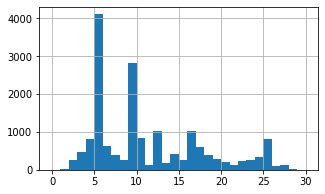

In [68]:
df['floors_total'].sort_values(ascending=True).hist(bins=30, range=(0,30), figsize=(5,3))

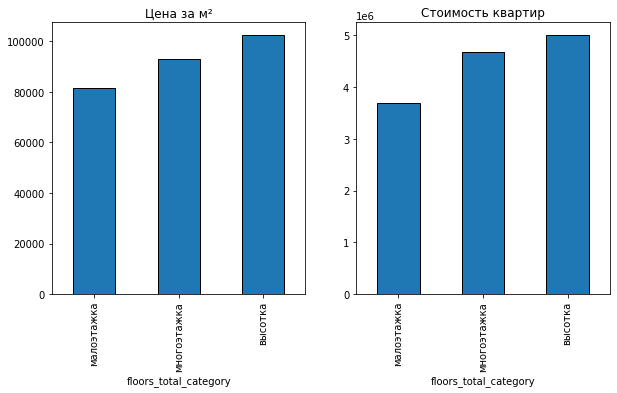

In [69]:

fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.query('floors_total < 27').groupby('floors_total_category')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='floors_total_category'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.query('floors_total < 27').groupby('floors_total_category')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='last_price'))
            
df_filtered_total_images_last.plot(x='floors_total_category'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** Существует значительная зависимость количества этажей в доме на стоимость за м² и на стоимость квартиры. Чем больше этажей в доме, тем больше цена за м² и больше стоимость квартиры. 

#### Параметр parks_nearest

count    5876.000000
mean      487.977195
std       337.354266
min         1.000000
25%       286.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

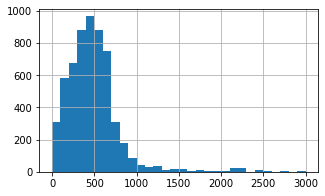

In [70]:
df['parks_nearest'].sort_values(ascending=True).hist(bins=30, range=(0,3000), figsize=(5,3))
df.parks_nearest.describe()

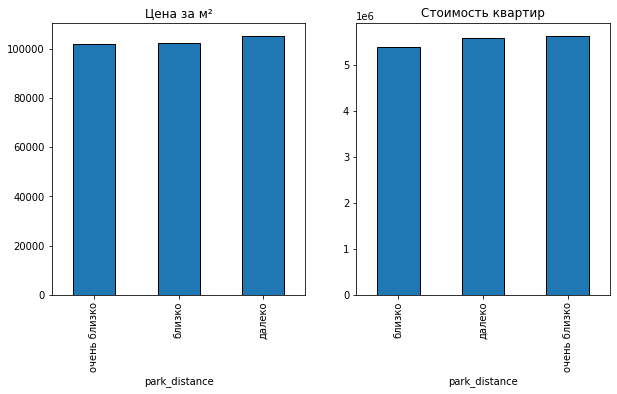

In [71]:
def distance_to_park(row):
    distance = row['parks_nearest']
    if distance <= 300:
        return 'очень близко'
    elif distance <= 600:
        return 'близко'
    elif distance > 600:
        return 'далеко' 

df['park_distance'] = df.apply(distance_to_park, axis=1)


fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.groupby('park_distance')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='park_distance'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.groupby('park_distance')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='park_distance'))
            
df_filtered_total_images_last.plot(x='park_distance'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** Расстояние до ближайшего парка влияет на стоимость как на стоимость за м² так и на стоимость квартиры несущественно.

#### Параметр open_plan

In [72]:
df.groupby('open_plan')['price_per_square_meter'].count()

open_plan
False    17204
True        51
Name: price_per_square_meter, dtype: int64

**Вывод:** Всего 51 объект недвижимости со свободной планировкой. Выборка не является репрезентативной.

#### Параметр airports_nearest

count    13442.000000
mean     28854.241556
std      12749.172658
min       6450.000000
25%      18428.000000
50%      26891.500000
75%      37407.000000
max      83758.000000
Name: airports_nearest, dtype: float64

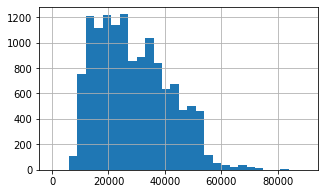

In [73]:
df['airports_nearest'].sort_values(ascending=True).hist(bins=30, range=(0,90000), figsize=(5,3))
df.airports_nearest.describe()

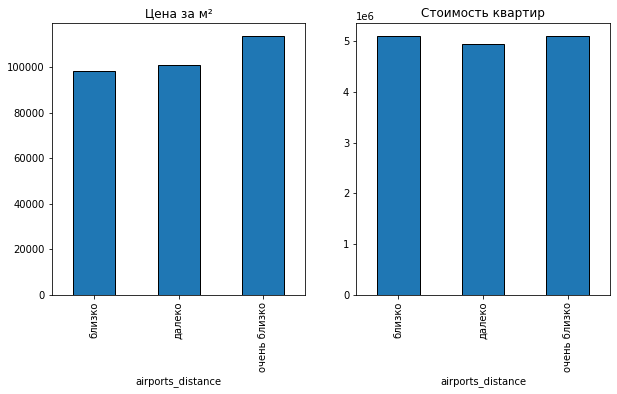

In [74]:
def distance_to_airport(row):
    distance = row['airports_nearest']
    if distance <= 10000:
        return 'очень близко'
    elif distance <= 30000:
        return 'близко'
    elif distance > 30000:
        return 'далеко' 
df['airports_distance'] = df.apply(distance_to_airport, axis=1)


fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.groupby('airports_distance')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='airports_distance'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.groupby('airports_distance')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='airports_distance'))
            
df_filtered_total_images_last.plot(x='airports_distance'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** Только близкое расстояние до ближайшего аэропорта влияет в большую сторону на стоимость за м². На стоимость квартиры влияние также есть в большую сторону, но уже не зачительное.

#### Параметр useful_area_ratio

count    17255.000000
mean         0.559338
std          0.121469
min          0.000000
25%          0.486486
50%          0.563380
75%          0.636364
max          1.637942
Name: useful_area_ratio, dtype: float64

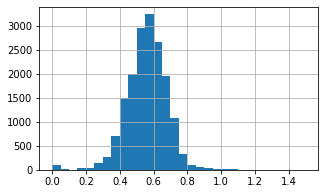

In [75]:
df['useful_area_ratio'].sort_values(ascending=True).hist(bins=30, range=(0,1.5), figsize=(5,3))
df.useful_area_ratio.describe()

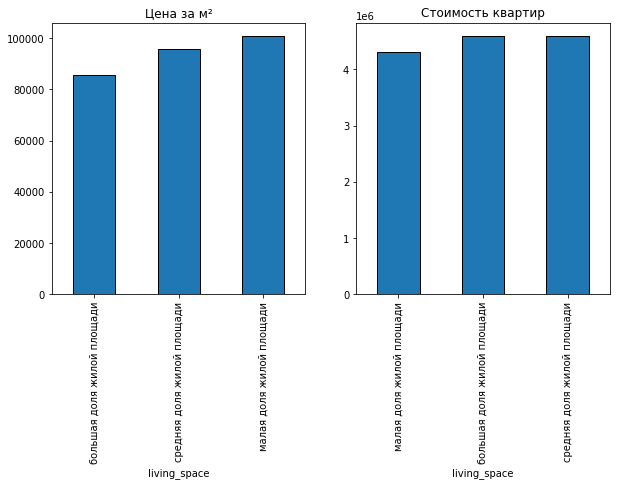

In [76]:
def living_space(row):
    living_space = row['useful_area_ratio']
    if living_space <= 0.49:
        return 'малая доля жилой площади'
    elif living_space <= 0.63:
        return 'средняя доля жилой площади'
    elif living_space > 0.63:
        return 'большая доля жилой площади' 
df['living_space'] = df.apply(living_space, axis=1)


fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.groupby('living_space')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='living_space'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.groupby('living_space')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='last_price'))
            
df_filtered_total_images_last.plot(x='living_space'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** Доля жилой площади по отношению к общей оказывает влияние, видимо, в основном только на цену за м², при этом в зависимостях наблюдается противоречивая динамика, поэтому судит о прямом влиянии нельзя.

#### Параметр kitchen_area_ratio

count    15871.000000
mean         0.189332
std          0.072443
min          0.025381
25%          0.135541
50%          0.175105
75%          0.234043
max          0.787879
Name: kitchen_area_ratio, dtype: float64

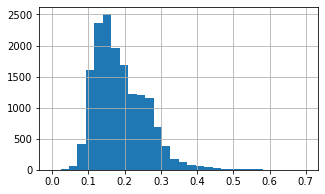

In [77]:
df['kitchen_area_ratio'].sort_values(ascending=True).hist(bins=30, range=(0,0.7), figsize=(5,3))
df.kitchen_area_ratio.describe()

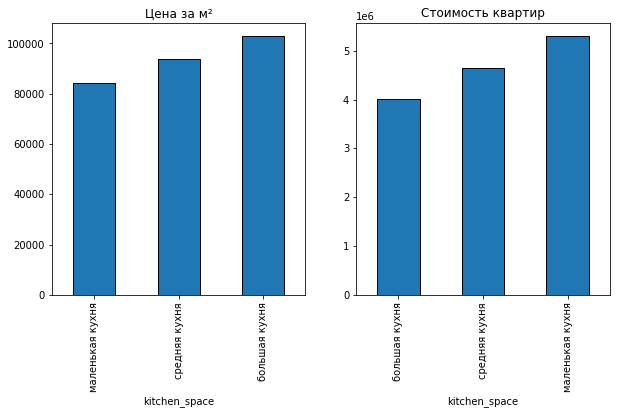

In [78]:
def kitchen_space(row):
    kitchen_space = row['kitchen_area_ratio']
    if kitchen_space <= 0.13:
        return 'маленькая кухня'
    elif kitchen_space <= 0.23:
        return 'средняя кухня'
    elif kitchen_space > 0.23:
        return 'большая кухня' 
df['kitchen_space'] = df.apply(kitchen_space, axis=1)


fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.groupby('kitchen_space')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='kitchen_space'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.groupby('kitchen_space')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='last_price'))
            
df_filtered_total_images_last.plot(x='kitchen_space'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** От доли кухни в общей пложади квартиры будет зависеть цена. Чем больше кухня тем больше цена за м², и меньше стоимость квартиры.

#### Параметр ponds_nearest

count    6636.000000
mean      523.802592
std       276.726619
min        13.000000
25%       303.000000
50%       509.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

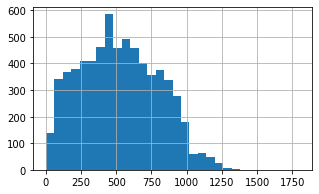

In [79]:
df['ponds_nearest'].sort_values(ascending=True).hist(bins=30, range=(0,1800), figsize=(5,3))
df.ponds_nearest.describe()

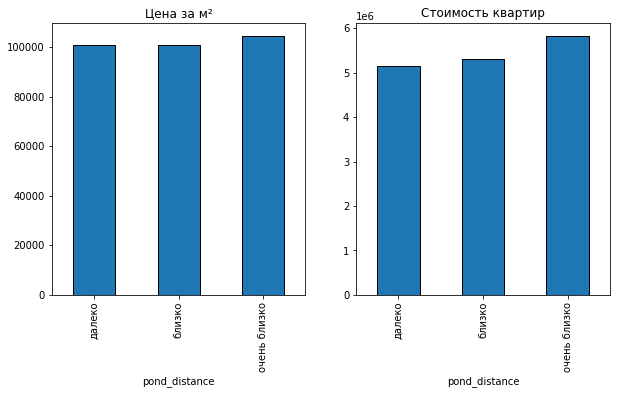

In [80]:
def distance_to_pond(row):
    distance = row['ponds_nearest']
    if distance <= 300:
        return 'очень близко'
    elif distance <= 734:
        return 'близко'
    elif distance > 734:
        return 'далеко' 

df['pond_distance'] = df.apply(distance_to_pond, axis=1)


fig, axes = plt.subplots(1,2,figsize=(15,4))

df_filtered_total_images = (df.groupby('pond_distance')
                 .median()['price_per_square_meter']
                 .reset_index()
                 .sort_values(ascending=True, by='price_per_square_meter'))

df_filtered_total_images.plot(x='pond_distance'
                 , y='price_per_square_meter'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[0]
                 , legend=None)

df_filtered_total_images_last = (df.groupby('pond_distance')
                 .median()['last_price']
                 .reset_index()
                 .sort_values(ascending=True, by='last_price'))
            
df_filtered_total_images_last.plot(x='pond_distance'
                 , y='last_price'
                 , kind='bar'
                 , ec='black' 
                 , fontsize=10
                 , figsize=(10,5)
                 , ax=axes[1]
                 , legend=None)

axes[0].set_title('Цена за м²')
axes[1].set_title('Стоимость квартир')

plt.show()

**Вывод:** Расстояние до ближайшего водоема оказывает небольшое влияние на стоимость за м² квартиры и большее влияние на стоимость квартиры в целом. Цем ближе водоём тем больше цена квартиры.

In [12]:
import numpy as np

import pandas as pd
mydictionary = {'names': ['Somu', 'Kiku', 'Amol', 'Lini'], 
                'physics': ['er', 'df', 'sd', 78], 
                'chemistry': [80, 80, 81, '79'], 
                'algebra': [78, 88, 82, 87]}


df_marks = pd.DataFrame(mydictionary)
print(df_marks)
res_mean = df_marks.mean() 
print(res_mean)


  names physics chemistry  algebra
0  Somu      er        80       78
1  Kiku      df        80       88
2  Amol      sd        81       82
3  Lini      78        79       87
algebra    83.75
dtype: float64


## Общий вывод

**В нашем распоряжении поступили данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.**

**Для начала была произведена предобработка данных, в том числе:**
1. Заменили пропуски в days_exposition на 0 и изменили тип данных на int.
2. Столбец locality_name оставили без изменений.
3. Исправили количество балконов на 0 и поменяли тип на int.
4. В столбце first_day_exposition необходимо изменить тип данных на datetime, но без времени, т.к. время не указано (везде 00:00:00)
5. В столбеце ceiling_height исправили 30 строк с необоснованно большими значениями. Пропуски пока оставили.
6. В столбеце is_apartment все пропущенные значения заменили на False.
7. В столбеце last_price в связи с тем что в цене на момент снятия с публикации везде 0 после запятой (0 копеек), изменили для удобства просмотра цену на тип int.
8. Столбец floors_total оставили без изменений.
9. Заменим пустые значения в столбце living_area на около медианные для каждого типа квартиры используя при этом случайное отклонение по Гаусу от медианного значения в 30%, для того чтоб не укрупнять само количество медианных значений и сохранили динамику данных.
10. Столбец kitchen_area оставили без изменений.
11. Столбец airports_nearest оставили без изменений.
12. Столбец city_centers_nearest оставили без изменений.
13. Столбец parks_around_3000 исправили. Заменили пропущенные значения на 0 и поменяем тип данных на int.
14. Столбец parks_nearest оставили без изменений.
15. Столбец ponds_around_3000 исправили. Заменили пропущенные значения на 0 и поменяем тип данных на int.
16. Столбец ponds_nearest оставили без изменений.

**Далее произведен расчет и добавлены в таблицу следующие данные:**
* Добавли в таблицу столбец price_per_square_meter с ценой квадратного метра.
* Добавли в таблицу столбец weekday_exposition с днем недели публикации, столбец month_exposition с месяцем публикации и столбец year_exposition с годом публикации объявления.
* С помощью функции добавили в таблицу столбец floor_category с категориями этажа квартиры в виде: первый, последний, другой.
* Добавли в таблицу столбец useful_area_ratio с соотношением жилой и общей площади и столбец kitchen_area_ratio с отношением площади кухни к общей площади объекта недвижимости.

**Произведен исследовательский анализ данных в результате которого получены следующие выводы:**
1. Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных соответствует распределению Гаусса.
2. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса. Цена за квадратный метр недвижимость начинается от 8000 руб, среднее значение цены 100000 руб, медиана 95000 руб и это говорит о незначительном разбросе цены. Распределение данных Гаусса.
3. Количество комнат колеблется от 1 до 19. Больше всего однокомнатных и двухкомнатных квартир.
4. Высота потолков в среднем составляет 2,7 м, медиана 2,65 м. Как и ожидалось есть сосредоточение на стандартных высотах таких как 2.5, 2.6 и 2.7 это связано с нормами строительства и отсутствия измерения перед публикацией объявления.
5. Продажа квартиры в среднем занимает около двух месяцев. Соответственно если продажа произошла за два месяца это довольно быстро, если больше будем считать что это медленно. Также стоит отметить что значительная часть квартир около 13% продается сразу в день публикации, но есть и очень долгие и редкие продажи с временем 3-4 года. Основная часть квартир продается за 6 месяцев.
6. После того как убрали редкие и выбивающиеся значения из столбца с количеством дней размещения объявления это: 0, 7, 30, 45, 60, 90 и все что больше 600. Обнаружилось что гистограмма стала похожа на нормальное распределение Гауса. И чем больше значений в датафрейме тем плавнее будет это распределение и меньше выбивающиеся значений.
7. Есть явная зависимость стоимости квадратного метра от удалённости от центра. Чем ближе к центру, тем выше стоимость.
8. Зависимость цены квадратного метра от числа комнат не значительная. Корреляции Пирсона - 0.17. Зато на гистограмме хорошо видно что цена за квадратный метр цена увеличивается если количество комнат увеличивается от нуля до трех и уменьшается от трех до больших значений числа комнат.
9. Согласно расчету и это видно на графике Самые дешевые квартиры на первом этаже, четь дороже на последнем и соответственно на средних этажах с категорией "другие" самые дорогие квартиры. Есть зависимость цены квадратного метра от этажа.
10. Из 10 населённых пунктов самая высокая стоимость жилья, с самым большим количеством объявлений, в Санкт-Петербурге, а самая низкая стоимость в Выборге.
11. Cудя по графику, где происходит сильное изменение, центр города будет находиться в радиусе около 5 километров.
12. В центре Санкт-Петербург чем меньше комнат, тем дороже стоимость метра квадратного, в отличие от всей выборки, где стоимость уменьшается в зависимости от удаленности от кол-ва комнат равных 3. Корреляция практически отсутствует, но на графике медианных значений явная зависимость прослеживается на отрезке от одной до 4-х комнат включительно.
13. Сравнивая квартиры в центре города и по всему городу можно сказать следующее:
*  В центре города мы очень часто будем встречать потолки высотой 3 метра, напротив, по городу в среднем это значение будет 2,5 метра. И это связано с тем что в основном новые квартиры с нынешними нормами в 2.5 метра строятся на свободных территориях т. е.  в пригороде.
*  Квартиры в центре более дорогие и более широко представлен их ценовой диапазон. В остальной части города квартиры дешевле.
*  Квартиры в центре чуть больше и более широко представлен их диапазон площади. В остальной части города квартиры как правило небольшие и связанно это, наверное, с миграцией не богатого населения в крупные города.
*  Распределение по числу комнат в центре и по всему городу показывает, что в центре в основном двух- и трехкомнатные квартиры, а за центром одна- и двухкомнатные.

*  Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от размера жилой площади и площади кухни, а также от количества комнат и высоты потолков. Небольшое влияние оказывает присутствие парков и водоемов рядом.
*  Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена.
*  Многие параметры оказывают довольно слабое влияние, но возможно их совокупность может оказывать заметное влияние на цену квартиры.
* Среди домов до 5 этажей включительно сравнивая средние этажи можно сказать что цена за м² не сильно отличается и подороже считается цена м² для квартир на 3 этаже. Стоимость квартир также отличается не значительно и самые дорогие квартиры на 2 и 3 этажах. 
* Среди домов до 9 этажей включительно сравнивая средние этажи можно сказать что цена за м² не сильно отличается и подороже считается цена м² для квартир на 2, 3 и 4 этажах. Стоимость квартир отличается более значительно и самые дорогие квартиры на 2,3 и 4 этажах, далее при увеличении этажа стоимость квартир снижается. 
* Для домов свыше 9 этажей цена за м² практически не зависит от этажа, можно сказать что при увеличении этажа стоимость м² увеличивается совсем не значительно, при этом на стоимость квартир это не влияет или влияет не значительно.
* Цена за м² увеличивается не значительно при увеличении числа балконов, при этом на стоимость квартир это влияет следующим образом: при одном балконе стоимость ниже, чем при двух балконах или без балконов.
* Цена за м² увеличивается, если квартира является апартаментами, при этом стоимость квартиры увеличивается значительно.
* Существует значительная зависимость количества этажей в доме на стоимость за м² и на стоимость квартиры. Чем больше этажей в доме, тем больше цена за м² и больше стоимость квартиры.
* Расстояние до ближайшего парка влияет на стоимость как на стоимость за м² так и на стоимость квартиры несущественно.
* Только близкое расстояние до ближайшего аэропорта влияет в большую сторону на стоимость за м². На стоимость квартиры влияние также есть в большую сторону, но уже не зачительное.
* Доля жилой площади по отношению к общей оказывает влияние, видимо, в основном только на цену за м², при этом в зависимостях наблюдается противоречивая динамика, поэтому судит о прямом влиянии нельзя.
* От доли кухни в общей пложади квартиры будет зависеть цена. Чем больше кухня тем больше цена за м², и меньше стоимость квартиры.
* Расстояние до ближайшего водоема оказывает небольшое влияние на стоимость за м² квартиры и большее влияние на стоимость квартиры в целом. Цем ближе водоём тем больше цена квартиры.